In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from IPython.display import clear_output

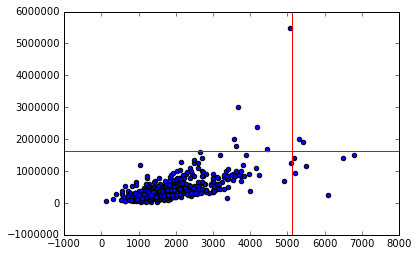

In [52]:
df = pd.read_csv("data/RealEstate.csv")
nObs = df.shape[0]
df = df.reindex(np.random.permutation(nObs))
df.reset_index(drop=1,inplace=1)
df.head()
plt.scatter(df.Size,df.Price)
maxPrice = np.percentile(df.Price,[99])[0]
maxSize = np.percentile(df.Size,[99])[0]
plt.axhline(maxPrice,c="r")
plt.axvline(maxSize,c="r")
plt.show()

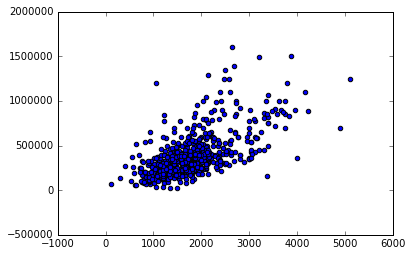

In [59]:
df = df[(df.Price < maxPrice) & (df.Size < maxSize)]
plt.scatter(df.Size,df.Price)
plt.show()

In [74]:
Y = df.Price.astype(np.float32)
X = df.Size.astype(np.float32)
X = np.expand_dims(X,1)
Y = np.expand_dims(Y,1)
norm = lambda x: (x-x.mean())/x.std()

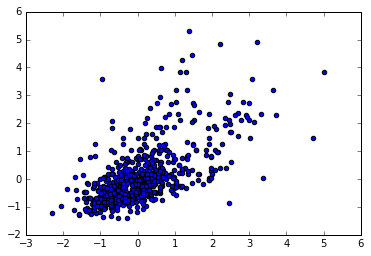

In [75]:
X = norm(X)
Y = norm(Y)
plt.scatter(X,Y); plt.show()

In [83]:
x, y = tf.placeholder(tf.float32,shape=[None,1]), tf.placeholder(tf.float32,shape=[None,1])
yPred = tf.Variable(tf.random_normal([1]), name='b')
for pow_i in range(1, 4):
    W = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.01), name='w_%d' % pow_i)
    yPred = tf.add(tf.mul(tf.pow(x, pow_i), W), yPred)

mse = tf.reduce_mean(tf.pow(yPred - y, 2))

mae = tf.reduce_mean(tf.abs(yPred - y))
train = tf.train.AdamOptimizer(1e-2).minimize(mse)

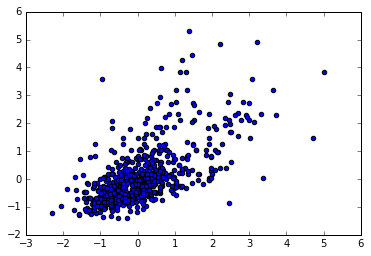

In [84]:
plt.scatter(X,Y)

0 of 4
1.35413


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


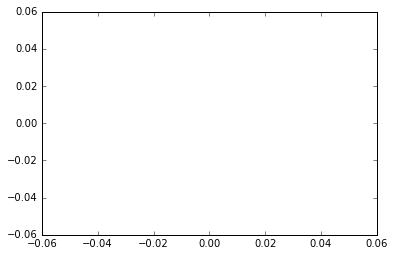

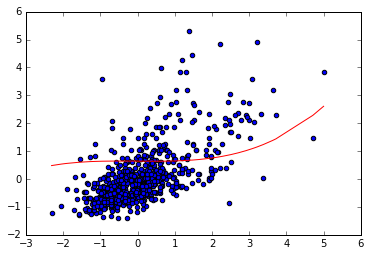

1 of 4
0.610368


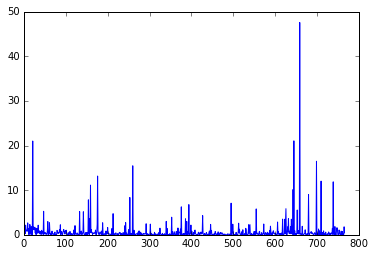

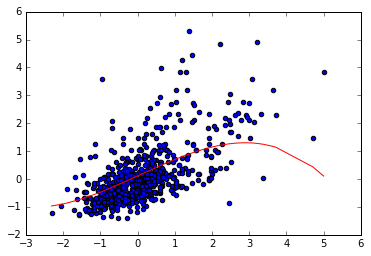

2 of 4
0.572861


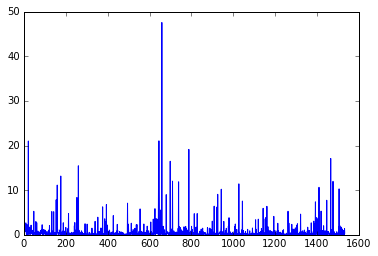

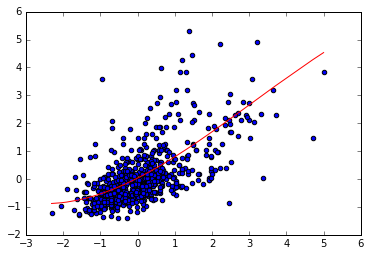

3 of 4
0.903245


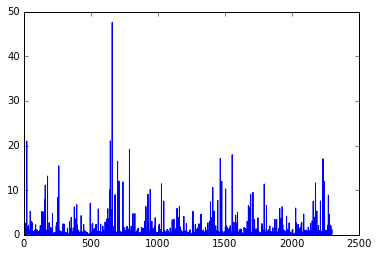

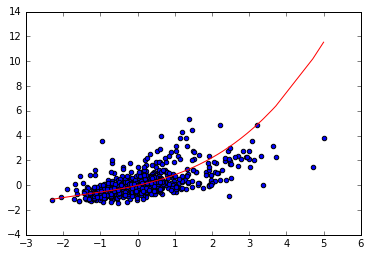

In [85]:
epochs = 4

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    # Fit all training data
    losses = []
    for epoch in tqdm_notebook(range(epochs)):
         
        print("{0} of {1}".format(epoch,epochs))
        trainLoss = mse.eval(feed_dict={x:X,y:Y})
        print(trainLoss)
        plt.plot(losses)
        plt.show()
    
        plt.scatter(X,Y)
        Xs = np.sort(X,0).copy()
        yPred_ = yPred.eval(feed_dict={x:Xs})
        plt.plot(Xs,yPred_,"r")
        plt.show()
        
        for (xi, yi) in zip(X, Y):
            xi = xi.reshape(1,1)
            yi = yi.reshape(1,1)
            _, loss = sess.run([train,mse], feed_dict={x: xi, y: yi})
            losses.append(loss)
        

